In [402]:
# Modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from tqdm import tqdm

# parameters
images_path = '/home/lsantiago/workspace/ic/Relatorio/Imagens'


## $$ u_{z} = \delta^2 \int_{0}^{\infty} u_{z}^{*}(\zeta) \zeta \,d\zeta $$
### 
## $$ u_{z}^{*}(\zeta) = - \left(a_{7}Ae^{-\delta \xi_{1}z} + a_{8}Ae^{-\delta \xi_{2}z} \right) $$

In [658]:
# Number of points in mesh
p = 1e-1 # position of the point
start = 1e-6 #
end = 5 #
scale = 100
N = scale * end

# Material properties and problem scope
#   Young modulus (E), Poisson's ratio (ν) and soil density (ρ)
E = 50e6 # [Pa]
ν = 0.3
ρ = 1.5e3 # [Kg/m^3]

#   Application of an uniformely distributed load (circular surface area: s_1 = 0) on a point (r,z). Values are arbitrary 
p_0 = 1e2 # [N]
ω = 1e4 # [Hz]
s_1 = 0 # [m]
s_2 = p/2 # [m] (10 cm)
r, z  = (s_2/10, s_2/1000) # [m] (point for which we're calculating the vertical displacement)

#    Constants for ISOTROPIC material (Barros Thesis, 2.7)
c_11 = E*(1-ν)/( (1+ν)*(1-2*ν) )
c_12 = E*ν/( (1+ν)*(1-2*ν) )
c_33 = c_11
c_13 = c_12
c_44 = (0.5)*(c_11 - c_12)


# Parameters for Hankel transforms
ζ = np.linspace(start, end, N) # Integration variable
δ = (ρ*ω**2/c_44) # Normalized frequency m^-1
α = (c_33/c_44)
β = (c_11/c_44)
κ = (c_13 + c_44)/(c_44)
γ = 1 + α*β - κ**2
ζ_c = ζ.astype(complex) # change to complex when it is an input to the square root function to avoid error when plotting complex exponential

#   Φ, ξ_i, υ_1
Φ = np.square(γ*np.square(ζ) - 1 - α) - 4*α*(β*np.power(ζ,4) - (1+β)*np.square(ζ) + 1)
Φ_c = Φ.astype(complex)
ξ_1 = 1 / np.sqrt(2*α)*np.sqrt(γ*np.square(ζ_c) - 1 - α + np.sqrt(Φ_c))
ξ_2 = 1 / np.sqrt(2*α)*np.sqrt(γ*np.square(ζ_c) - 1 - α - np.sqrt(Φ_c))
υ_1 = (α*np.square(ξ_1) - np.square(ζ) + 1)/(κ*np.square(ζ))
υ_2 = (α*np.square(ξ_2) - np.square(ζ) + 1)/(κ*np.square(ζ))


#   H_0, a_i, b_i
H_0 = np.power(ζ, -1)*(s_2*sc.j1(ζ*s_2) - s_1*sc.j1(ζ*s_1))*p_0
a_7 = δ*ξ_1*sc.j0(δ*ζ*r)
a_8 = δ*ξ_2*sc.j0(δ*ζ*r)
b_21 = (α*(δ**2)*np.square(ξ_1) - (κ-1)*(δ**2)*np.square(ζ)*υ_1)*(sc.j0(δ*ζ*r))
b_22 = (α*(δ**2)*np.square(ξ_2) - (κ-1)*(δ**2)*np.square(ζ)*υ_2)*(sc.j0(δ*ζ*r))
b_51 = (1 + υ_1)*δ*ξ_1*(-δ*ζ*sc.j1(δ*ζ*r))
b_52 = (1 + υ_2)*δ*ξ_2*(-δ*ζ*sc.j1(δ*ζ*r))

#   Arbitrary functions from boundary conditions
A = ((b_52)/(b_21*b_52 - b_51*b_22)) * (H_0/c_44)
C = -((b_51)/(b_21*b_52 - b_51*b_22)) * (H_0/c_44)

In [659]:

u_z = -(a_7*A*np.exp(-δ*ξ_1*z) + a_8*C*np.exp(-δ*ξ_2*z)) # Integrand for Green function

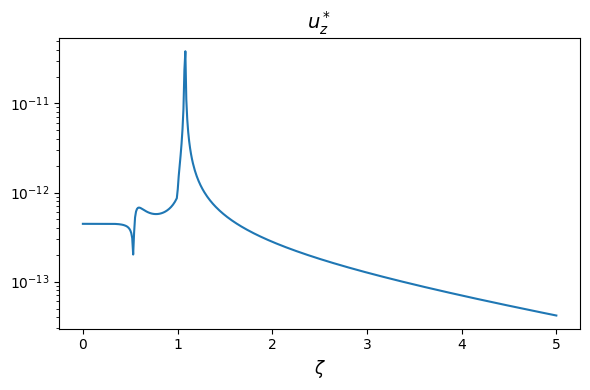

In [662]:
x = ζ
y = u_z

l_map = {
    'zeta':f"$\zeta$",
    'uz*':f"$u_z^*$"
}

plt.figure(figsize=(6,4))
plt.plot(x, abs(y))
plt.title(l_map['uz*'], fontsize=14)
plt.xlabel(l_map['zeta'], fontsize=12)
plt.yscale('log')
# plt.xlim([0.9,1+ 1e-2])
plt.tight_layout()
plt.show()

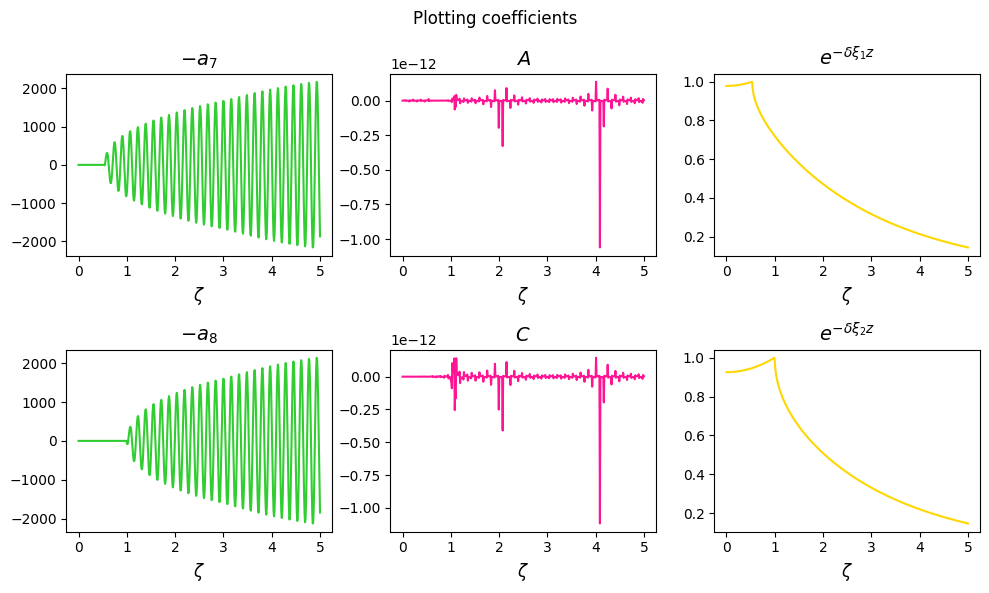

In [661]:
fig, ax = plt.subplots(2,3, figsize=(10,6))
c = ['limegreen', 'deeppink', 'gold']

ax[0,0].plot(ζ, -a_7, color=c[0])
ax[0,0].set_xlabel(f"$\zeta$", fontsize=12)
ax[0,0].set_title(f"$-a_7$", fontsize=14)

ax[0,1].plot(ζ, -A, color=c[1])
ax[0,1].set_xlabel(f"$\zeta$", fontsize=12)
ax[0,1].set_title(f"$A$", fontsize=14)

ax[0,2].plot(ζ, np.exp(-δ*ξ_1*z), color=c[2])
ax[0,2].set_xlabel(f"$\zeta$", fontsize=12)
ax[0,2].set_title(f"$e^{{-\delta \u03BE_1 z}}$", fontsize=14)

ax[1,0].plot(ζ, -a_8, color=c[0])
ax[1,0].set_xlabel(f"$\zeta$", fontsize=12)
ax[1,0].set_title(f"$-a_8$", fontsize=14)

ax[1,1].plot(ζ, C, color=c[1])
ax[1,1].set_xlabel(f"$\zeta$", fontsize=12)
ax[1,1].set_title(f"$C$", fontsize=14)

ax[1,2].plot(ζ, np.exp(-δ*ξ_2*z), color=c[2])
ax[1,2].set_xlabel(f"$\zeta$", fontsize=12)
ax[1,2].set_title(f"$e^{{-\delta \u03BE_2 z}}$", fontsize=14)

fig.suptitle('Plotting coefficients')
fig.tight_layout()
plt.show()